In [13]:
#column No - description
#14 - Quarter number (YYYYQ(1-4))
#15 - Current Assets Total
#16 - Debt in Current Liabilities
#17 - Long-term Debt Total
#18 - Depreciation & Amortization Total
#19 - Net Interest Income - Tax Equivalent
#20 - Net Income (Loss)
#21 - Operating Income after Depreciation - Quarterly
#22 - Revenue Total
#23 - Interest Expense Total (Financial Services)
#24 - Income Taxes Total
#25 - Debt (Other) Long Term
#26 - Changes in Current Debt

#Levarage Ratio = (Long-term Debt Total + Debt in Current Liabilities) /Current Assets Total
#EBITDA = (Operating Income after Depreciation - Quarterly) + Depreciation & Amortization Total 
#Operating Income includes EBIT
#Interest Coverage Ratio (Interest Expense Total (Financial Services) / EBITDA) -> do not worry 
#for now


#Reading in the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

raw_data = pd.read_csv('firm-data.csv')

In [14]:
raw_data.head(15)

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,...,datacqtr,datafqtr,actq,dlcq,dlttq,dpq,niq,oiadpq,revtq,costat
0,1010,19620731,1962,1,INDL,C,D,STD,4165A,00099V004,...,1962Q2,1962Q1,NaN,NaN,NaN,NaN,0.440,NaN,41.9,I
1,1010,19621031,1962,2,INDL,C,D,STD,4165A,00099V004,...,1962Q3,1962Q2,NaN,NaN,NaN,NaN,1.950,NaN,48.5,I
2,1010,19630131,1962,3,INDL,C,D,STD,4165A,00099V004,...,1962Q4,1962Q3,NaN,NaN,NaN,NaN,1.650,NaN,51.3,I
3,1010,19630430,1962,4,INDL,C,D,STD,4165A,00099V004,...,1963Q1,1962Q4,NaN,NaN,NaN,9.98,1.980,15.61,62.6,I
4,1010,19630731,1963,1,INDL,C,D,STD,4165A,00099V004,...,1963Q2,1963Q1,NaN,NaN,NaN,NaN,1.950,NaN,56.0,I
5,1010,19631031,1963,2,INDL,C,D,STD,4165A,00099V004,...,1963Q3,1963Q2,NaN,NaN,NaN,NaN,1.830,NaN,58.5,I
6,1010,19640131,1963,3,INDL,C,D,STD,4165A,00099V004,...,1963Q4,1963Q3,NaN,NaN,NaN,NaN,1.700,NaN,47.9,I
7,1010,19640430,1963,4,INDL,C,D,STD,4165A,00099V004,...,1964Q1,1963Q4,NaN,NaN,NaN,11.29,2.380,19.02,66.3,I
8,1010,19640731,1964,1,INDL,C,D,STD,4165A,00099V004,...,1964Q2,1964Q1,NaN,NaN,NaN,NaN,2.280,NaN,62.4,I
9,1010,19641031,1964,2,INDL,C,D,STD,4165A,00099V004,...,1964Q3,1964Q2,NaN,NaN,NaN,NaN,3.210,NaN,68.5,I


In [15]:
raw_data.drop(['gvkey', 'datafqtr', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc', 'datafmt',
              'tic', 'conm', 'curcdq', 'datacqtr', 'costat'], axis=1, inplace=True)
raw_data.rename(index=str, columns={'cusip': 'cusip', 'datadate': 'Date', 'actq': 'current assets (total)',
                                   'dlcq': 'debt in current liabilities', 'dlttq': 'total long-term debt', 'dpq': 'depreciation and amortization total',
                                   'niq': 'net income (loss)', 'oiadpq': 'operating income (after depreciation)',
                                   'revtq': 'revenue (total)', 'dlcchy': 'changes in current debt (yearly)'}, inplace=True)
raw_data.head(15)

,Date,cusip,current assets (total),debt in current liabilities,total long-term debt,depreciation and amortization total,net income (loss),operating income (after depreciation),revenue (total)
0,19620731,00099V004,NaN,NaN,NaN,NaN,0.440,NaN,41.9
1,19621031,00099V004,NaN,NaN,NaN,NaN,1.950,NaN,48.5
2,19630131,00099V004,NaN,NaN,NaN,NaN,1.650,NaN,51.3
3,19630430,00099V004,NaN,NaN,NaN,9.98,1.980,15.61,62.6
4,19630731,00099V004,NaN,NaN,NaN,NaN,1.950,NaN,56.0
5,19631031,00099V004,NaN,NaN,NaN,NaN,1.830,NaN,58.5
6,19640131,00099V004,NaN,NaN,NaN,NaN,1.700,NaN,47.9
7,19640430,00099V004,NaN,NaN,NaN,11.29,2.380,19.02,66.3
8,19640731,00099V004,NaN,NaN,NaN,NaN,2.280,NaN,62.4
9,19641031,00099V004,NaN,NaN,NaN,NaN,3.210,NaN,68.5


In [16]:
#raw_data.sort_values(by=['Date'], inplace=True)
#raw_data.set_index(['Date', 'cusip'], inplace=True)
# raw_data.reset_index(inplace=True)
raw_data.loc[19711231]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [19711231] of <class 'int'>

In [33]:
print(len(raw_data) - raw_data.count())

cusip                                        0
year-quarter                                 0
current assets (total)                   24021
debt in current liabilities              14058
total long-term debt                      4906
depreciation and amortization total      27501
net income (loss)                         1364
operating income (after depreciation)     3947
revenue (total)                           8773
changes in current debt (yearly)         81562
dtype: int64


In [34]:
raw_data['total debt'] = raw_data['total long-term debt'] + raw_data['debt in current liabilities']
raw_data['change in debt'] = raw_data['total debt'].diff().bfill()
raw_data['leverage ratio'] = raw_data['total debt']/raw_data['current assets (total)'] # check if data has seasonal component
raw_data['EBITDA'] = raw_data['operating income (after depreciation)'] + raw_data['depreciation and amortization total']
raw_data['debt overhang'] = raw_data['total debt']/raw_data['EBITDA']
raw_data['change in debt to assets'] = raw_data['change in debt']/raw_data['current assets (total)']
raw_data['change in debt to revenue'] = raw_data['change in debt']/raw_data['EBITDA']
# raw_data

# len(raw_data) - raw_data.count()

In [35]:
# convert year-quarter to datetime object
month_dict = {'Q1':1, 'Q2':4, 'Q3':7, 'Q4':10}
print(raw_data['year-quarter'][0][4:])
raw_data['Date'] = datetime.datetime(1900,1,1)
for i, val in raw_data.iterrows():
    raw_data.loc[i, 'Date'] = datetime.datetime(int(raw_data.loc[i, 'year-quarter'][:4]), month_dict[raw_data.loc[i, 'year-quarter'][4:]], 1)
# raw_data

Q1


In [36]:
raw_data.drop(['year-quarter', 'changes in current debt (yearly)'], axis=1, inplace=True)
raw_data.head(15)

,cusip,current assets (total),debt in current liabilities,total long-term debt,depreciation and amortization total,net income (loss),operating income (after depreciation),revenue (total),total debt,change in debt,leverage ratio,EBITDA,debt overhang,change in debt to assets,change in debt to revenue,Date
0,00099V004,236.704,0.754,250.143,7.729,8.704,19.340,166.967,250.897,-8.420,1.059961,27.069,9.268795,-0.035572,-0.311057,1976-01-01
1,00099V004,220.055,2.073,240.404,7.829,9.352,20.815,170.748,242.477,-8.420,1.101893,28.644,8.465193,-0.038263,-0.293953,1976-04-01
2,00099V004,213.686,1.062,238.064,8.020,8.417,16.214,140.242,239.126,-3.351,1.119053,24.234,9.867376,-0.015682,-0.138277,1976-07-01
3,00099V004,228.098,14.092,235.926,8.279,7.554,15.657,153.144,250.018,10.892,1.096099,23.936,10.445271,0.047751,0.455047,1976-10-01
4,00099V004,244.979,5.891,257.402,8.513,8.036,17.243,173.438,263.293,13.275,1.074757,25.756,10.222589,0.054188,0.515414,1977-01-01
5,00099V004,248.154,23.229,250.130,8.676,9.962,20.602,179.599,273.359,10.066,1.101570,29.278,9.336669,0.040564,0.343808,1977-04-01
6,00099V004,245.461,22.135,248.759,8.875,7.492,16.213,162.940,270.894,-2.465,1.103613,25.088,10.797752,-0.010042,-0.098254,1977-07-01
7,00099V004,254.260,11.368,259.656,8.933,10.421,22.274,189.727,271.024,0.130,1.065933,31.207,8.684718,0.000511,0.004166,1977-10-01
8,00099V004,285.458,33.366,274.318,9.912,7.454,18.694,179.090,307.684,36.660,1.077861,28.606,10.755925,0.128425,1.281549,1978-01-01
9,00099V004,298.118,48.291,271.881,10.266,10.287,24.574,219.230,320.172,12.488,1.073977,34.840,9.189782,0.041889,0.358439,1978-04-01


In [40]:
# create lag assets (4 quarter moving average)
# raw_data.sort_values(by=['cusip', 'Date'], inplace=True)
# raw_data = raw_data.set_index(['cusip', 'Date'])

for q, df in raw_data.groupby(level=0):
    raw_data.loc[q, 'lagged assets'] = df['current assets (total)'].rolling(4).mean().bfill()
    raw_data.loc[q, 'change in debt to lagged assets'] = df['change in debt'] / df['lagged assets']
    
raw_data = raw_data.reset_index()

In [41]:
raw_data.head()

,cusip,Date,current assets (total),debt in current liabilities,total long-term debt,depreciation and amortization total,net income (loss),operating income (after depreciation),revenue (total),total debt,change in debt,leverage ratio,EBITDA,debt overhang,change in debt to assets,change in debt to revenue,lagged assets,change in debt to lagged assets
0,000886309,1982-01-01,NaN,NaN,NaN,0.814,0.664,1.292,15.393,NaN,-1.371,NaN,2.106,NaN,NaN,-0.650997,31.78025,-0.04314
1,000886309,1982-04-01,NaN,NaN,NaN,0.901,0.895,1.682,19.562,NaN,-1.371,NaN,2.583,NaN,NaN,-0.530778,31.78025,-0.04314
2,000886309,1982-07-01,NaN,NaN,NaN,0.956,1.403,2.205,22.895,NaN,-1.371,NaN,3.161,NaN,NaN,-0.433724,31.78025,-0.04314
3,000886309,1982-10-01,31.611,0.342,8.037,1.129,1.502,2.435,23.804,8.379,-1.371,0.265066,3.564,2.351010,-0.043371,-0.384680,31.78025,-0.04314
4,000886309,1983-01-01,31.222,0.344,6.664,0.927,0.699,1.844,15.915,7.008,-1.371,0.224457,2.771,2.529051,-0.043911,-0.494767,31.78025,-0.04314


In [50]:
# sort by quarter and leverage ratio for quarter
#raw_data
#raw_data['abs debt overhang'] = np.abs(raw_data['debt overhang'])

#raw_data.sort_values(by=['year-quarter', 'change in debt to assets'], inplace=True)
raw_data.sort_values(by=['Date', 'leverage ratio'], inplace=True)
#display(raw_data)


In [51]:
# organize to multi-index and drop peripheral quarters
dataset_leverage = raw_data[raw_data['leverage ratio'].notnull()].set_index(['Date', 'cusip'])
dataset_leverage.drop([datetime.datetime(1975,7,1), datetime.datetime(1975,10,1), datetime.datetime(2018,1,1), datetime.datetime(2018,4,1)], axis=0, level=0, inplace=True)
dataset_leverage

current assets (total)  debt in current liabilities  \
Date       cusip                                                            
1976-01-01 093671105                  48.281                        0.000   
           134411107                  31.179                        0.000   
           257075101                  55.250                        0.000   
           291101103                  51.096                        0.000   
           339099103                 114.196                        0.000   
           345838106                   5.540                        0.000   
           412693103                  18.131                        0.000   
           458140100                  86.524                        0.000   
           543162101                  57.770                        0.000   
           552653107                 330.684                        0.000   
           578592107                  91.001                        0.000   
           693715203                 132.628                        0.000   
           725906101                  77.965                        0.000   
           81211K100                   7.367                        0.000   
           903290104                 288.787                        0.000   
           G3156P103                  11.700                        0.000   
           257867200                 175.038                        0.000   
           666416102                  26.754                        0.394   
           220291108                  94.011                        0.570   
           571748102                 148.523                        4.000   
           884315102                  71.366                        0.778   
           37184G104                  47.754                        1.132   
           731095105                 647.472                       24.137   
           411631104                 113.408                        2.051   
           384802104                 122.603                        0.524   
           067383109                  72.010                        0.688   
           437614100                  85.350                        1.658   
           478160104                1022.521                       22.168   
           460690100                 155.230                        3.590   
           635771108                  14.315                        0.110   
...                                      ...                          ...   
2017-10-01 760759100                1436.800                      706.700   
           143658300                1596.000                     2202.000   
           816851109                3341.000                     2967.000   
           018802108                 905.100                     1270.900   
           126408103                1915.000                       19.000   
           053774105                2066.000                       26.000   
           26884L109                1163.055                        7.999   
           13645T100                1274.000                      746.000   
           26441C204                8453.000                     5407.000   
           165167107                1525.000                       52.000   
           337932107                3108.000                     1382.000   
           817565104                 481.296                      364.580   
           462613001                 353.709                      148.000   
           25746U109                4334.000                     6376.000   
           V7780T103                 843.028                     1188.514   
           156700106                4194.000                      443.000   
           69351T106                2294.000                     1428.000   
           75281A109                 429.234                        0.000   
           969457100                2179.000                      501.000   
           03027X1

In [80]:
dates = []
credits = []
assets = []
ratios = []
for q, df in dataset_leverage.groupby(level=0):
    # print(len(pd.qcut(df['leverage ratio'], 10, labels=range(1,11)).values))
    dataset_leverage.loc[q, 'leverage score'] = pd.qcut(df['leverage ratio'], 10, labels=False).values + 1
    dataset_leverage.loc[q, 'change in debt score'] = pd.qcut(df['change in debt to assets'], 5, labels=False)
    dataset_leverage.loc[q, 'change in debt score 2'] = pd.qcut(df['change in debt to lagged assets'], 5, labels=False)
    # dataset_leverage.loc[q, 'change in debt score 2'] = pd.qcut(df['change in debt to revenue'], 5, labels=False)
    dates.append(q)
    credits.append(df['total debt'].sum())
    assets.append(df['current assets (total)'].sum())
    ratios.append(df['current assets (total)'].sum()/df['total debt'].sum())

# display(dataset_leverage.loc['1976Q1'].head(200))

/Users/wesleyyuan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


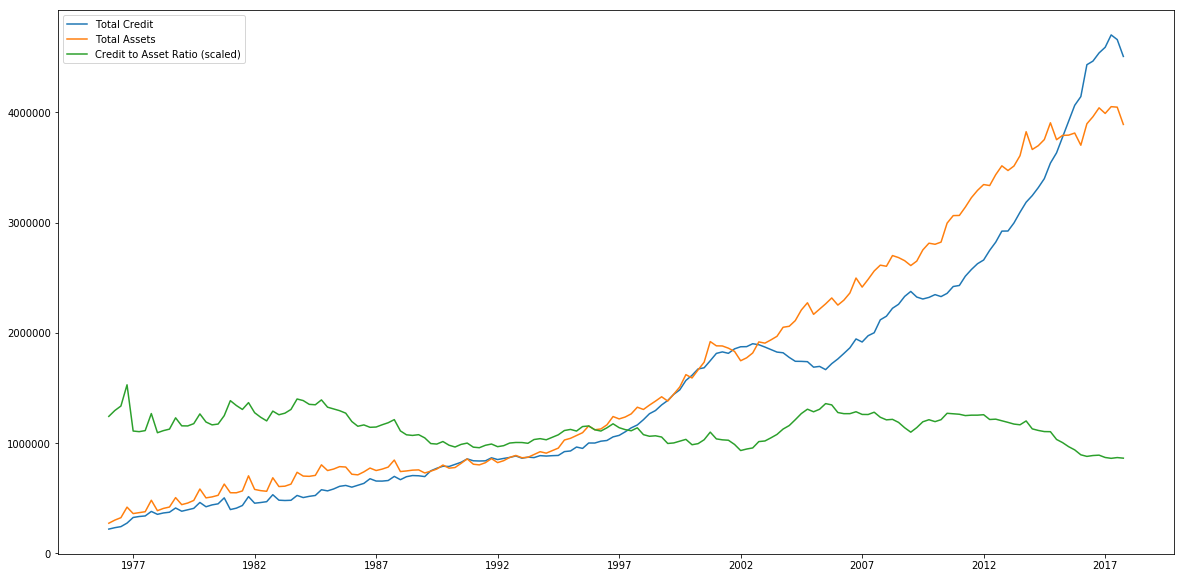

In [98]:
plt.figure(figsize=(20,10))
plt.plot(dates, credits)
plt.plot(dates, assets)
plt.plot(dates, [1000000*x for x in ratios])
plt.legend(labels=['Total Credit', 'Total Assets', 'Credit to Asset Ratio (scaled)'])
plt.show()

In [54]:
rec_spans = []
rec_spans.append([datetime.datetime(1980,1,1), datetime.datetime(1980,6,1)])
rec_spans.append([datetime.datetime(1981,7,1), datetime.datetime(1982,10,1)])
rec_spans.append([datetime.datetime(1990,7,1), datetime.datetime(1991,2,1)])
rec_spans.append([datetime.datetime(2001,3,1), datetime.datetime(2001,10,1)])
rec_spans.append([datetime.datetime(2007,12,1), datetime.datetime(2009,5,1)])

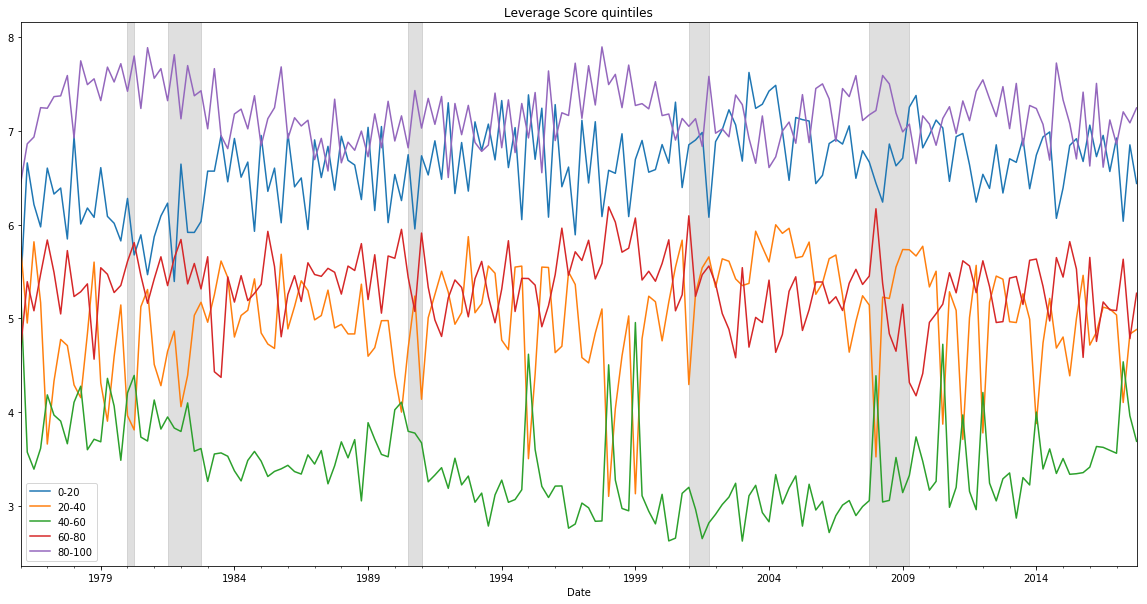

In [60]:
#Leverage ratio - assets owned

tracked_quintiles = []

for q, df in dataset_leverage.groupby(level=0):
    temp_scores = df['leverage score']
    # print(temp_scores)
    #temp_ratios = np.log(df['leverage ratio'])
    temp_ranking = df['change in debt score 2'] # using lagged assets credit score
    p_20 = temp_scores[temp_ranking.values == 0].mean()
    p_40 = temp_scores[temp_ranking.values == 1].mean()
    p_60 = temp_scores[temp_ranking.values == 2].mean()
    p_80 = temp_scores[temp_ranking.values == 3].mean()
    p_100 = temp_scores[temp_ranking.values == 4].mean()
    tracked_quintiles.append([p_20, p_40, p_60, p_80, p_100])
    
quarters = raw_data['Date'].drop_duplicates(keep='first')
quarters.drop(quarters[quarters==datetime.datetime(1975, 7, 1)].index, inplace=True)
quarters.drop(quarters[quarters==datetime.datetime(1975, 10, 1)].index, inplace=True)
quarters.drop(quarters[quarters==datetime.datetime(2018, 1, 1)].index, inplace=True)
quarters.drop(quarters[quarters==datetime.datetime(2018, 4, 1)].index, inplace=True)
tracked_quintiles = pd.DataFrame(tracked_quintiles, index=quarters, columns=['0-20', '20-40', '40-60', '60-80', '80-100'])
# tracked_quintiles = pd.DataFrame(tracked_quintiles)
#display(tracked_quintiles.index)
tracked_quintiles.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.title('Leverage Score quintiles')
plt.show()

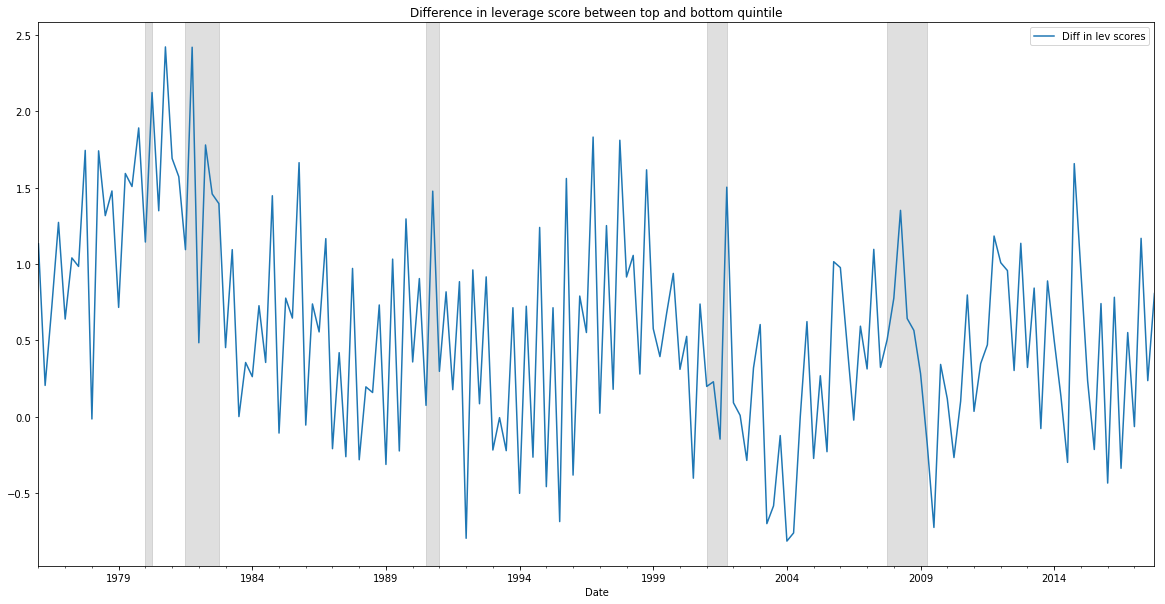

In [132]:
top_bottom_diff = pd.DataFrame(tracked_quintiles['80-100'] - tracked_quintiles['0-20'], index=tracked_quintiles.index, columns=['Diff in lev scores'])
# top_bottom_diff['norm_min_max'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].min())/(top_bottom_diff['Diff in lev scores'].max() - top_bottom_diff['Diff in lev scores'].min())
# top_bottom_diff['norm_mean'] = top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean()
# top_bottom_diff['norm_mean_std'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean())/top_bottom_diff['Diff in lev scores'].std()
# top_bottom_diff.drop('Diff in lev scores', axis=1, inplace=True)
top_bottom_diff.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.title('Difference in leverage score between top and bottom quintile')
plt.show()

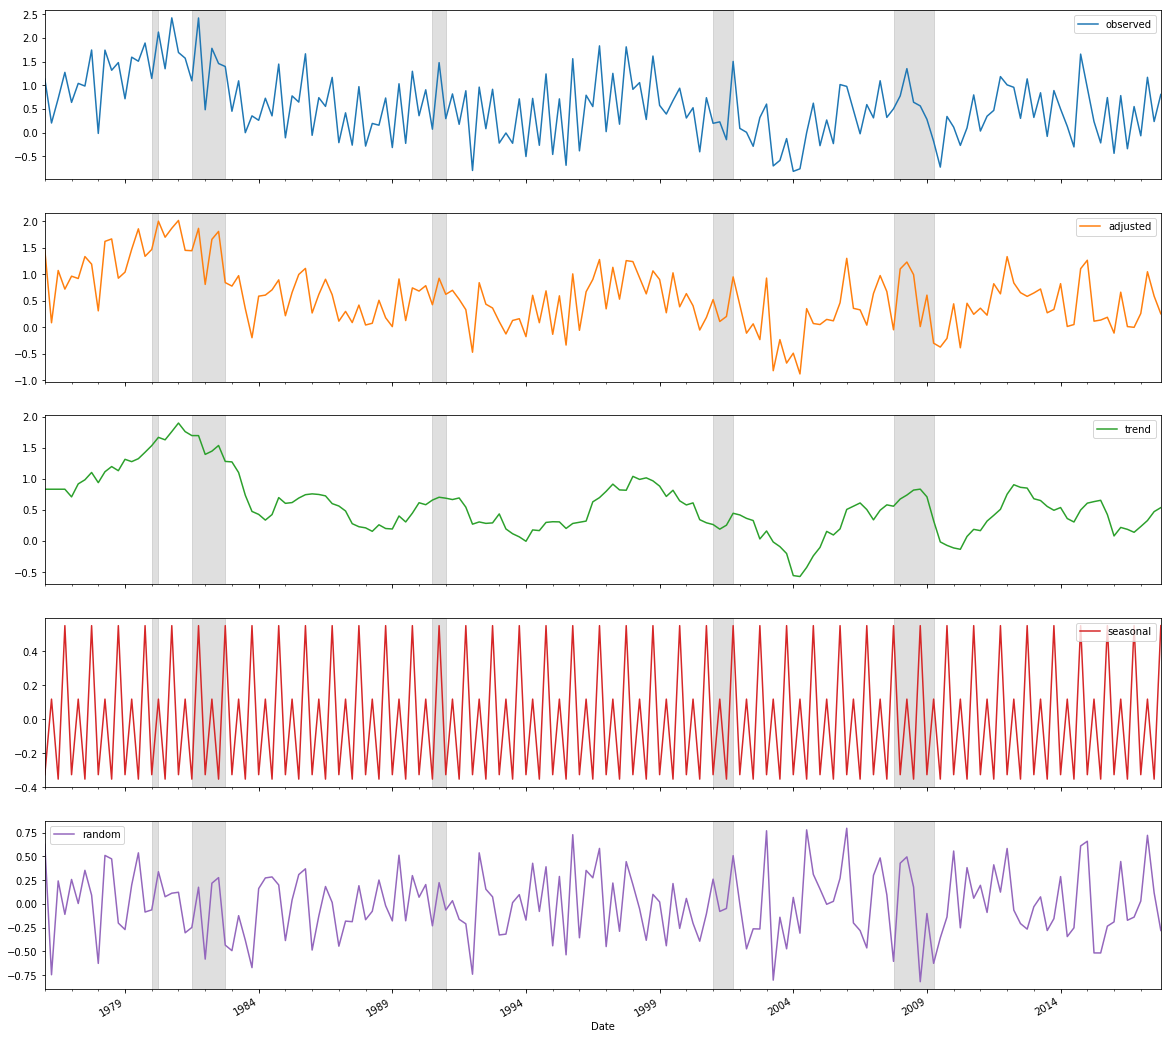

In [133]:
# seasonal decomposition by additive
tb_trend = top_bottom_diff.rolling(4).mean().bfill()
tb_detrend = np.array(top_bottom_diff - tb_trend)
tb_detrend = tb_detrend.reshape((-1,4))
tb_seasonal = np.mean(tb_detrend, axis=0)
tb_seasonal_decomp = pd.DataFrame(top_bottom_diff).rename(index=quarters, columns={'Diff in lev scores':'observed'})
tb_seasonal_decomp['trend'] = tb_trend
tb_seasonal_decomp['seasonal'] = np.tile(tb_seasonal, int(len(tb_trend)/len(tb_seasonal)))
tb_seasonal_decomp['random'] = tb_seasonal_decomp['observed'] - tb_seasonal_decomp['trend'] - tb_seasonal_decomp['seasonal']
tb_seasonal_decomp['adjusted'] = tb_seasonal_decomp['observed'] - tb_seasonal_decomp['seasonal']
tb_seasonal_decomp = tb_seasonal_decomp[['observed', 'adjusted', 'trend', 'seasonal', 'random']]
axes = tb_seasonal_decomp.plot(figsize=(20,20), subplots=True, legend=True)
for j in range(len(axes)):
    for i in range(len(rec_spans)):
        axes[j].axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')
plt.show()

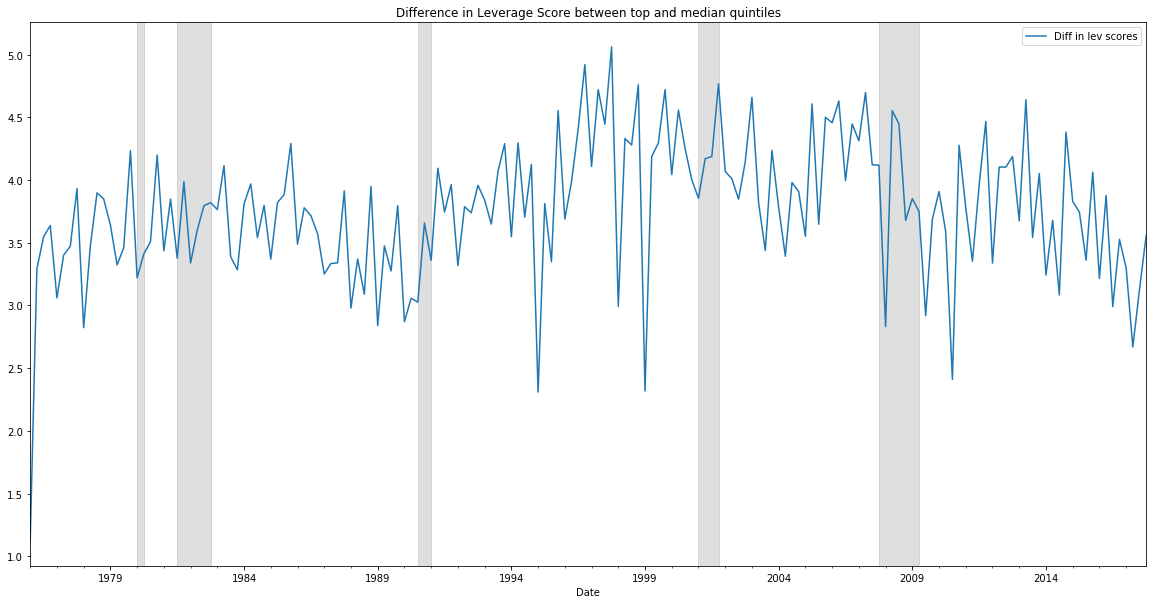

In [134]:
top_mid_diff = pd.DataFrame(tracked_quintiles['80-100'] - tracked_quintiles['40-60'], index=tracked_quintiles.index, columns=['Diff in lev scores'])
# top_mid_diff['norm_min_max'] = (top_mid_diff['Diff in lev scores'] - top_mid_diff['Diff in lev scores'].min())/(top_mid_diff['Diff in lev scores'].max() - top_mid_diff['Diff in lev scores'].min())
# top_bottom_diff['norm_mean'] = top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean()
# top_bottom_diff['norm_mean_std'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean())/top_bottom_diff['Diff in lev scores'].std()
top_mid_diff.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
plt.title('Difference in Leverage Score between top and median quintiles')
plt.show()

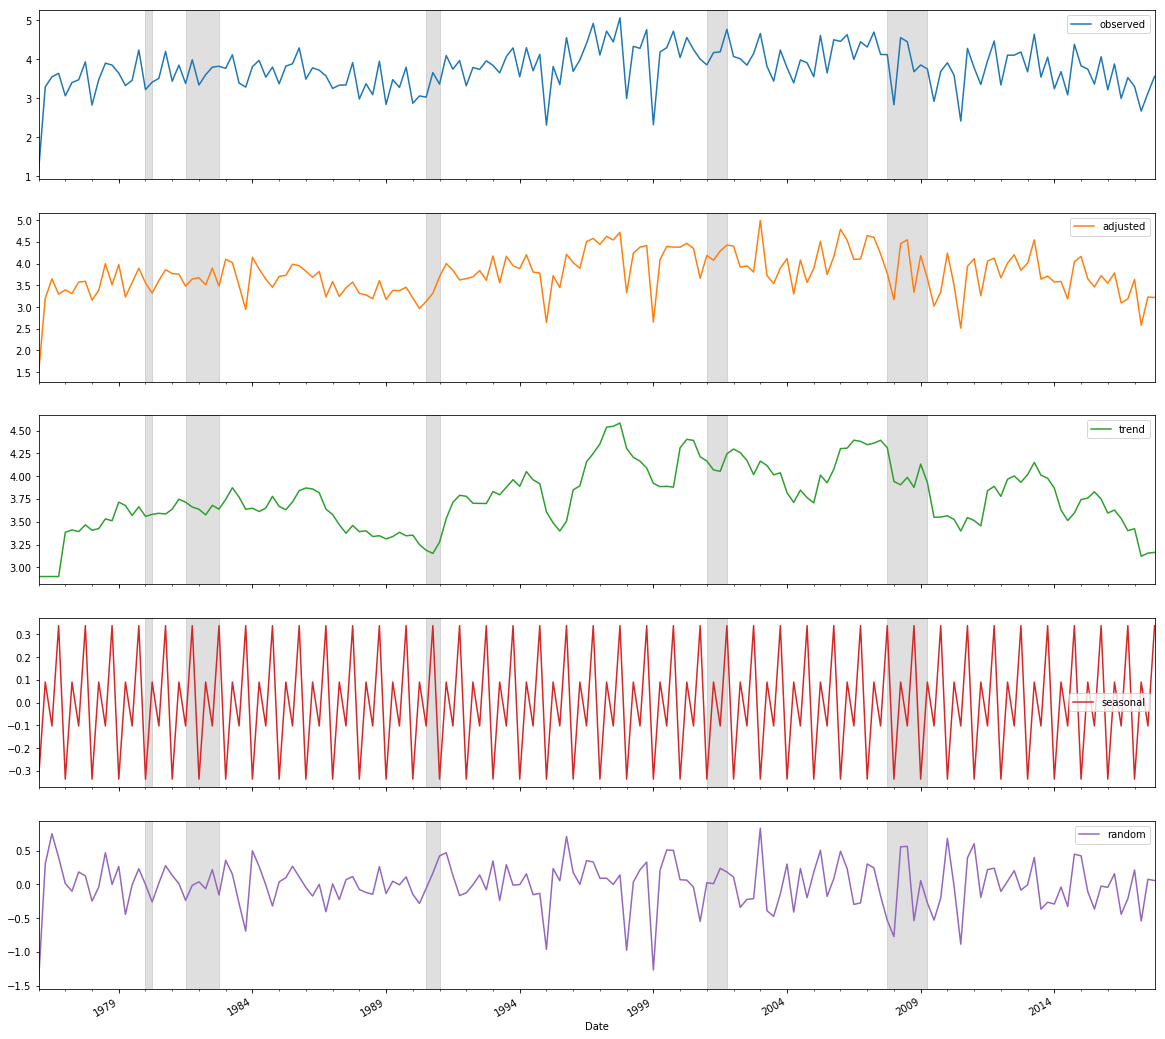

In [137]:
# seasonal decomposition by additive
tm_trend = top_mid_diff.rolling(4).mean().bfill()
tm_detrend = np.array(top_mid_diff - tm_trend)
tm_detrend = tm_detrend.reshape((-1,4))
tm_seasonal = np.mean(tm_detrend, axis=0)
tm_seasonal_decomp = pd.DataFrame(top_mid_diff).rename(index=quarters, columns={'Diff in lev scores':'observed'})
tm_seasonal_decomp['trend'] = tm_trend
tm_seasonal_decomp['seasonal'] = np.tile(tm_seasonal, int(len(tm_trend)/len(tm_seasonal)))
tm_seasonal_decomp['random'] = tm_seasonal_decomp['observed'] - tm_seasonal_decomp['trend'] - tm_seasonal_decomp['seasonal']
tm_seasonal_decomp['adjusted'] = tm_seasonal_decomp['observed'] - tm_seasonal_decomp['seasonal']
tm_seasonal_decomp = tm_seasonal_decomp[['observed', 'adjusted', 'trend', 'seasonal', 'random']]
axes = tm_seasonal_decomp.plot(figsize=(20,20), subplots=True, legend=True)
for j in range(len(axes)):
    for i in range(len(rec_spans)):
        axes[j].axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')
plt.show()

In [139]:
# forward fill to get matching monthly data
rep_trend = np.repeat(tb_seasonal_decomp['adjusted'], 3)
rep_trend2 = np.repeat(tm_seasonal_decomp['adjusted'], 3)
sample_range = pd.date_range(start='1/1/1976', end='12/1/2017', freq='MS')

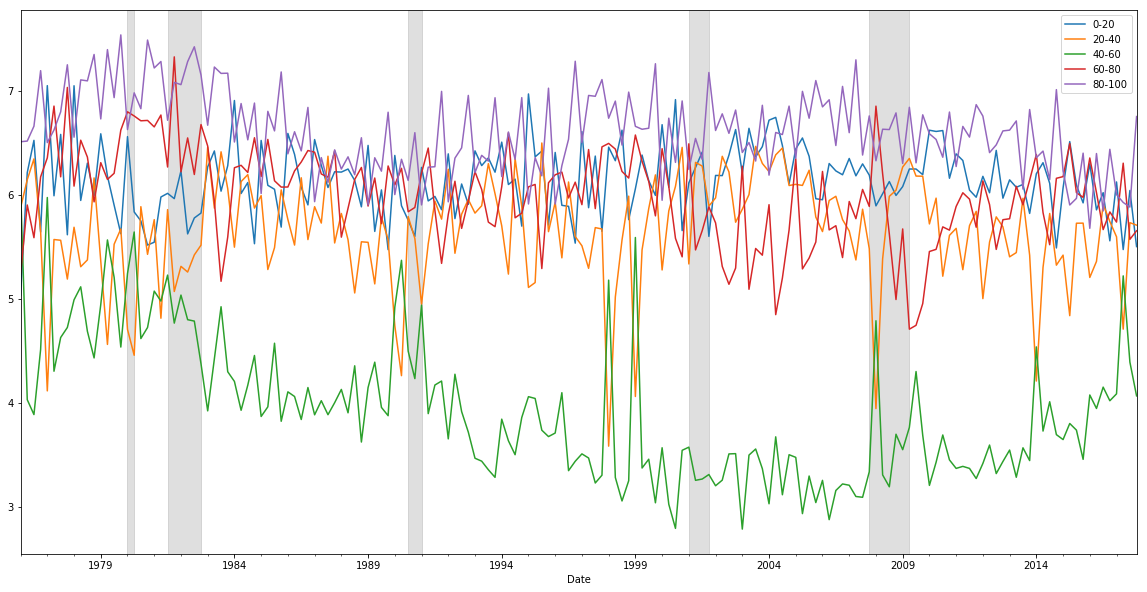

In [70]:
#Leverage ratio - revenue

tracked_quintiles = []

for q, df in dataset_leverage.groupby(level=0):
    temp_scores = df['leverage score']
    # print(temp_scores)
    #temp_ratios = np.log(df['leverage ratio'])
    temp_ranking = df['change in debt score 2']
    p_20 = temp_scores[temp_ranking.values == 0].mean()
    p_40 = temp_scores[temp_ranking.values == 1].mean()
    p_60 = temp_scores[temp_ranking.values == 2].mean()
    p_80 = temp_scores[temp_ranking.values == 3].mean()
    p_100 = temp_scores[temp_ranking.values == 4].mean()
    tracked_quintiles.append([p_20, p_40, p_60, p_80, p_100])
    
quarters = raw_data['Date'].drop_duplicates(keep='first')
quarters.drop(['35748', '35749', '3307', '8950'], inplace=True)
tracked_quintiles = pd.DataFrame(tracked_quintiles, index=quarters, columns=['0-20', '20-40', '40-60', '60-80', '80-100'])
# tracked_quintiles = pd.DataFrame(tracked_quintiles)
#display(tracked_quintiles.index)
tracked_quintiles.plot(figsize=(20,10), legend=True)
#plt.figure(figsize=(20,10))
# plt.plot(tracked_quintiles.index, tracked_quintiles['80-100'] - tracked_quintiles['0-20'])
#plt.plot(tracked_quintiles.index, tracked_quintiles)
# plt.legend(labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()

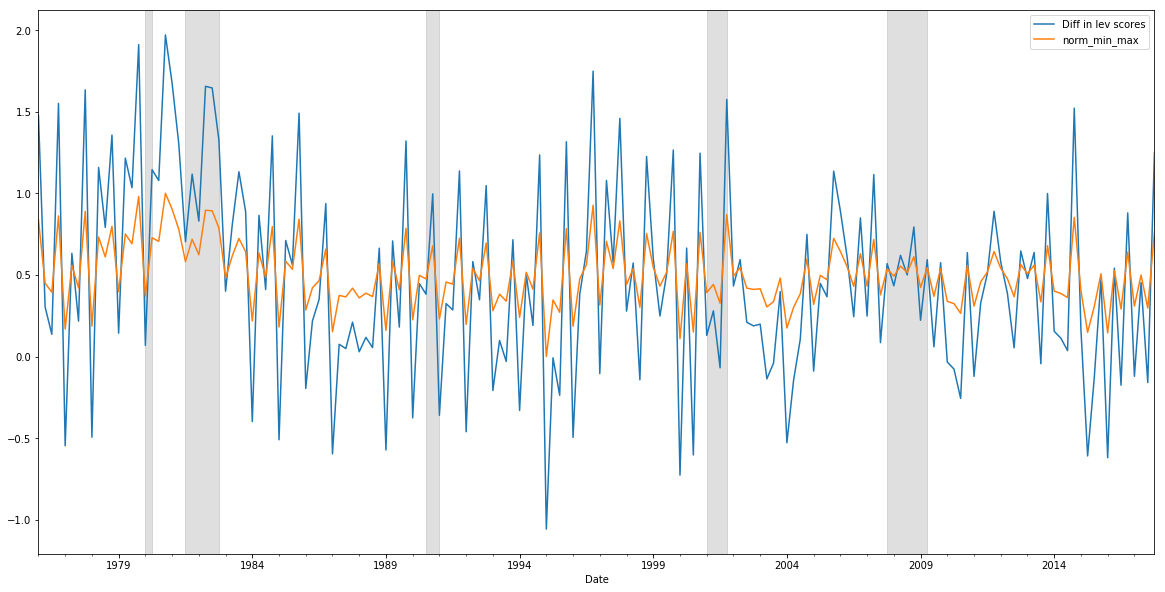

In [71]:
top_bottom_diff = pd.DataFrame(tracked_quintiles['80-100'] - tracked_quintiles['0-20'], index=tracked_quintiles.index, columns=['Diff in lev scores'])
top_bottom_diff['norm_min_max'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].min())/(top_bottom_diff['Diff in lev scores'].max() - top_bottom_diff['Diff in lev scores'].min())
# top_bottom_diff['norm_mean'] = top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean()
# top_bottom_diff['norm_mean_std'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean())/top_bottom_diff['Diff in lev scores'].std()
top_bottom_diff.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()

In [74]:
raw_data['abs debt overhang'] = np.abs(raw_data['debt overhang'])
raw_data_2 = raw_data.sort_values(by=['Date', 'abs debt overhang'])
dataset_overhang = raw_data_2[raw_data_2['debt overhang'].notnull() & (raw_data_2['debt overhang'] != np.inf)].set_index(['Date', 'cusip'])
dataset_overhang.drop([datetime.datetime(1975,7,1), datetime.datetime(1975,10,1), datetime.datetime(2018,1,1), datetime.datetime(2018,4,1)], axis=0, level=0, inplace=True)
dataset_overhang

current assets (total)  debt in current liabilities  \
Date       cusip                                                            
1976-01-01 G3156P103                  11.700                        0.000   
           134411107                  31.179                        0.000   
           257075101                  55.250                        0.000   
           339099103                 114.196                        0.000   
           345838106                   5.540                        0.000   
           412693103                  18.131                        0.000   
           543162101                  57.770                        0.000   
           578592107                  91.001                        0.000   
           693715203                 132.628                        0.000   
           725906101                  77.965                        0.000   
           960878106                     NaN                        0.000   
           257867200                 175.038                        0.000   
           884315102                  71.366                        0.778   
           220291108                  94.011                        0.570   
           384802104                 122.603                        0.524   
           256129107                  49.926                        0.710   
           37184G104                  47.754                        1.132   
           294429105                  39.836                        1.280   
           781088109                  57.519                        1.322   
           437614100                  85.350                        1.658   
           902384106                  21.666                        1.750   
           731095105                 647.472                       24.137   
           427866108                 168.647                        0.046   
           260561105                  89.947                        0.878   
           87901J105                  64.423                        3.109   
           158663104                 284.179                       11.172   
           565849106                 674.314                        2.653   
           635771108                  14.315                        0.110   
           487836108                 412.963                       12.671   
           373712108                 117.911                        1.795   
...                                      ...                          ...   
2017-10-01 549282101                  16.991                        0.000   
           001547108                1833.900                        0.000   
           552953101                2374.627                      158.042   
           G7665A101                1560.400                        0.000   
           949746101                     NaN                   103256.000   
           78410G104                 259.533                       21.147   
           925550105                1667.000                        0.900   
           577081102                3111.588                      250.000   
           412822108                3884.742                     2400.751   
           46625H100                     NaN                   183102.000   
           G65431101                1038.975                      249.843   
           H8817H100                4606.000                      250.000   
           060505104                     NaN                   209531.000   
           92924F106                 985.889                      809.844   
           784635104                 632.500                        7.500   
           222070203                3581.500                      209.100   
           61166W101                8651.000                      870.000   
           336433107                3832.772                       18.236   
           369604103                     NaN                    24657.000   
           0185811

In [75]:
for q, df in dataset_overhang.groupby(level=0):
    dataset_overhang.loc[q, 'debt score'] = pd.qcut(df['abs debt overhang'], 10, labels=False).values + 1
    dataset_overhang.loc[q, 'change in debt score'] = pd.qcut(df['change in debt to assets'], 5, labels=False)
    dataset_overhang.loc[q, 'change in debt score 2'] = pd.qcut(df['change in debt to revenue'], 5, labels=False)

display(dataset_overhang)

/Users/wesleyyuan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


current assets (total)  debt in current liabilities  \
Date       cusip                                                            
1976-01-01 G3156P103                  11.700                        0.000   
           134411107                  31.179                        0.000   
           257075101                  55.250                        0.000   
           339099103                 114.196                        0.000   
           345838106                   5.540                        0.000   
           412693103                  18.131                        0.000   
           543162101                  57.770                        0.000   
           578592107                  91.001                        0.000   
           693715203                 132.628                        0.000   
           725906101                  77.965                        0.000   
           960878106                     NaN                        0.000   
           257867200                 175.038                        0.000   
           884315102                  71.366                        0.778   
           220291108                  94.011                        0.570   
           384802104                 122.603                        0.524   
           256129107                  49.926                        0.710   
           37184G104                  47.754                        1.132   
           294429105                  39.836                        1.280   
           781088109                  57.519                        1.322   
           437614100                  85.350                        1.658   
           902384106                  21.666                        1.750   
           731095105                 647.472                       24.137   
           427866108                 168.647                        0.046   
           260561105                  89.947                        0.878   
           87901J105                  64.423                        3.109   
           158663104                 284.179                       11.172   
           565849106                 674.314                        2.653   
           635771108                  14.315                        0.110   
           487836108                 412.963                       12.671   
           373712108                 117.911                        1.795   
...                                      ...                          ...   
2017-10-01 549282101                  16.991                        0.000   
           001547108                1833.900                        0.000   
           552953101                2374.627                      158.042   
           G7665A101                1560.400                        0.000   
           949746101                     NaN                   103256.000   
           78410G104                 259.533                       21.147   
           925550105                1667.000                        0.900   
           577081102                3111.588                      250.000   
           412822108                3884.742                     2400.751   
           46625H100                     NaN                   183102.000   
           G65431101                1038.975                      249.843   
           H8817H100                4606.000                      250.000   
           060505104                     NaN                   209531.000   
           92924F106                 985.889                      809.844   
           784635104                 632.500                        7.500   
           222070203                3581.500                      209.100   
           61166W101                8651.000                      870.000   
           336433107                3832.772                       18.236   
           369604103                     NaN                    24657.000   
           0185811

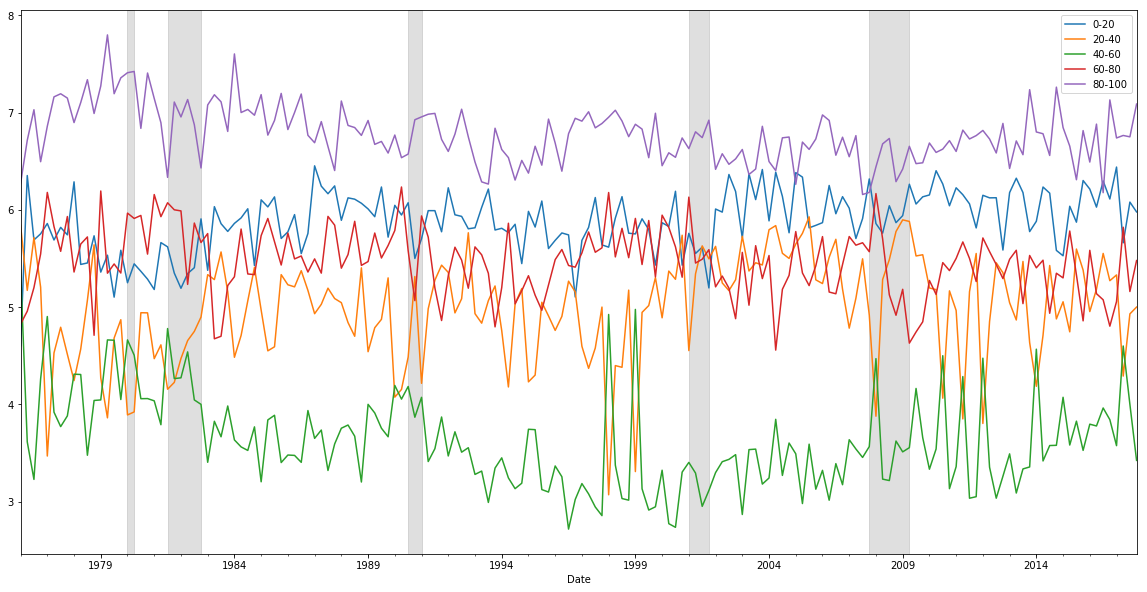

In [76]:
# Debt overhang - assets owned

tracked_quintiles = []

for q, df in dataset_overhang.groupby(level=0):
    temp_scores = df['debt score']
    # print(temp_scores)
    #temp_ratios = np.log(df['leverage ratio'])
    temp_ranking = df['change in debt score']
    p_20 = temp_scores[temp_ranking.values == 0].mean()
    p_40 = temp_scores[temp_ranking.values == 1].mean()
    p_60 = temp_scores[temp_ranking.values == 2].mean()
    p_80 = temp_scores[temp_ranking.values == 3].mean()
    p_100 = temp_scores[temp_ranking.values == 4].mean()
    tracked_quintiles.append([p_20, p_40, p_60, p_80, p_100])
    
tracked_quintiles = pd.DataFrame(tracked_quintiles, index=quarters, columns=['0-20', '20-40', '40-60', '60-80', '80-100'])
#display(tracked_quintiles)
tracked_quintiles.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()

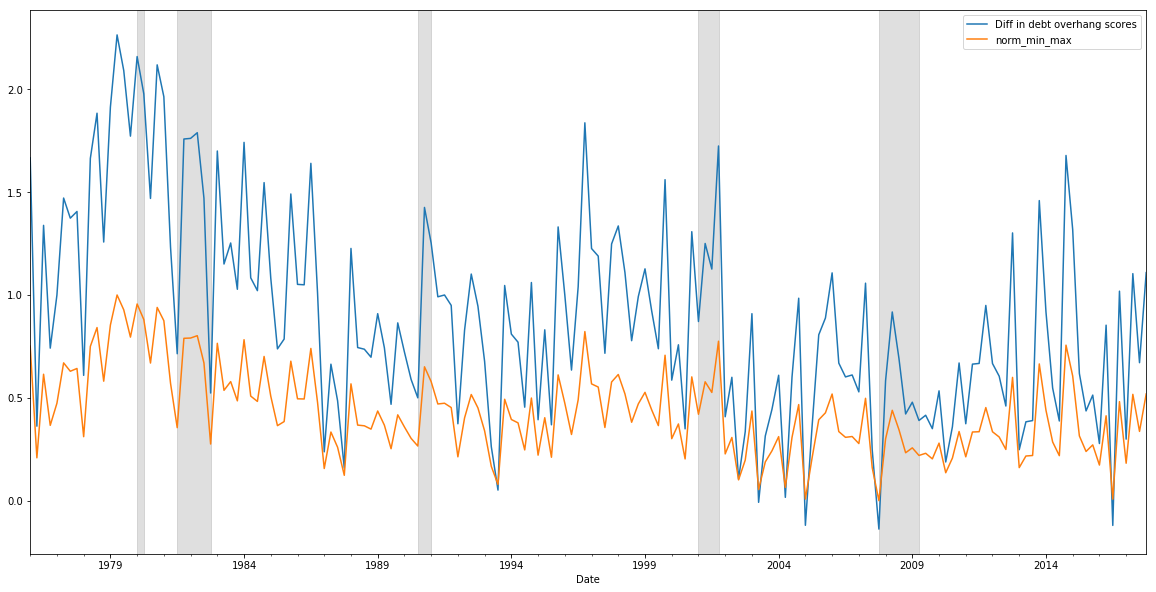

In [77]:
top_bottom_diff = pd.DataFrame(tracked_quintiles['80-100'] - tracked_quintiles['0-20'], index=tracked_quintiles.index, columns=['Diff in debt overhang scores'])
top_bottom_diff['norm_min_max'] = (top_bottom_diff['Diff in debt overhang scores'] - top_bottom_diff['Diff in debt overhang scores'].min())/(top_bottom_diff['Diff in debt overhang scores'].max() - top_bottom_diff['Diff in debt overhang scores'].min())
# top_bottom_diff['norm_mean'] = top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean()
# top_bottom_diff['norm_mean_std'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean())/top_bottom_diff['Diff in lev scores'].std()
top_bottom_diff.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()

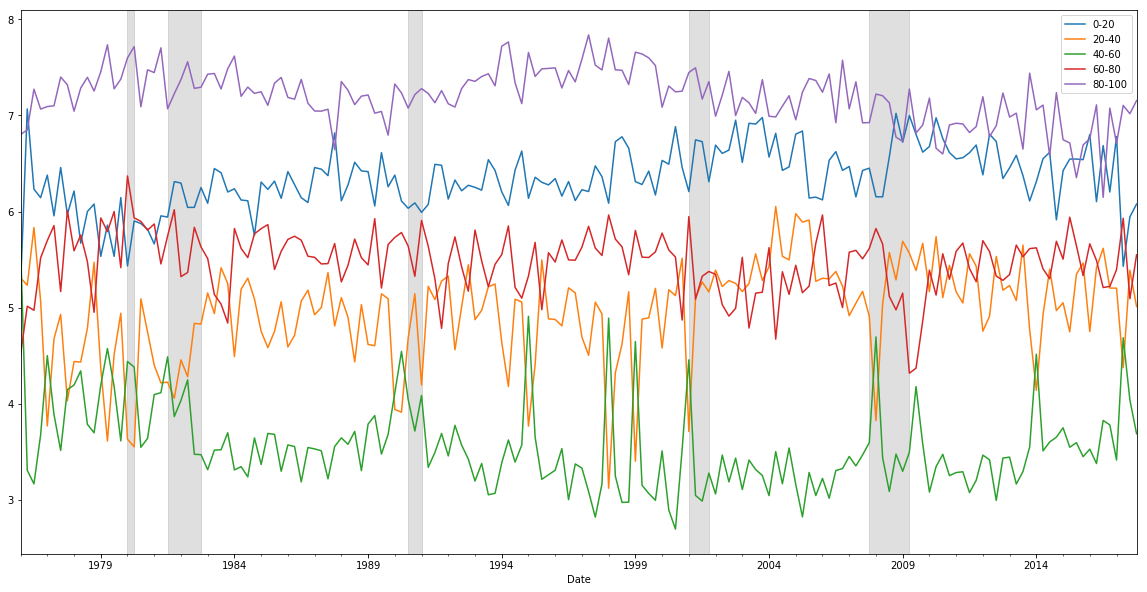

In [78]:
# Debt overhang - revenue
tracked_quintiles = []

for q, df in dataset_overhang.groupby(level=0):
    temp_scores = df['debt score']
    # print(temp_scores)
    #temp_ratios = np.log(df['leverage ratio'])
    temp_ranking = df['change in debt score 2']
    p_20 = temp_scores[temp_ranking.values == 0].mean()
    p_40 = temp_scores[temp_ranking.values == 1].mean()
    p_60 = temp_scores[temp_ranking.values == 2].mean()
    p_80 = temp_scores[temp_ranking.values == 3].mean()
    p_100 = temp_scores[temp_ranking.values == 4].mean()
    tracked_quintiles.append([p_20, p_40, p_60, p_80, p_100])
    
tracked_quintiles = pd.DataFrame(tracked_quintiles, index=quarters, columns=['0-20', '20-40', '40-60', '60-80', '80-100'])
#display(tracked_quintiles)
tracked_quintiles.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()

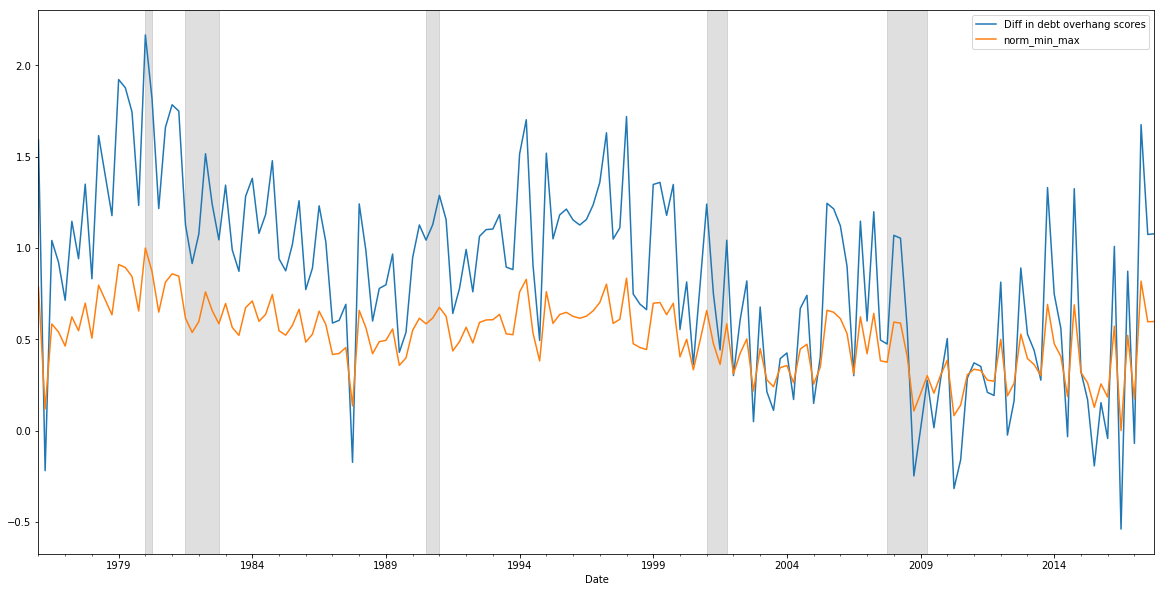

In [79]:
top_bottom_diff = pd.DataFrame(tracked_quintiles['80-100'] - tracked_quintiles['0-20'], index=tracked_quintiles.index, columns=['Diff in debt overhang scores'])
top_bottom_diff['norm_min_max'] = (top_bottom_diff['Diff in debt overhang scores'] - top_bottom_diff['Diff in debt overhang scores'].min())/(top_bottom_diff['Diff in debt overhang scores'].max() - top_bottom_diff['Diff in debt overhang scores'].min())
# top_bottom_diff['norm_mean'] = top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean()
# top_bottom_diff['norm_mean_std'] = (top_bottom_diff['Diff in lev scores'] - top_bottom_diff['Diff in lev scores'].mean())/top_bottom_diff['Diff in lev scores'].std()
top_bottom_diff.plot(figsize=(20,10), legend=True)
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
'''plt.axvspan(16, 17, alpha=0.25, color='grey')
plt.axvspan(21, 26, alpha=0.25, color='grey')
plt.axvspan(57, 60, alpha=0.25, color='grey')
plt.axvspan(100, 102, alpha=0.25, color='grey')
plt.axvspan(127, 133, alpha=0.25, color='grey')'''
plt.show()